##### <h1 id="aa" align="center"> A STUDY OF BANK CUSTOMER CHURN </h1> 


Description of each variable:
<ul>
<li>Credit_score — credit rating </li>
<li>geography — client country</li>
<li>gender — client gender</li>
<li>age — client age</li>
<li>tenure — number of years spent by the client with the bank </li>
<li>balance — client account balance</li>
<li>num_of_product — number of products that the client purchased from the bank</li>
<li>has_cr_card — the client has a credit card</li>
<li>is-_active_member — active client </li>
<li>estimated_salary — clien salary</li>
<li>exited — client left the bank </li>    
</ul>

In [310]:
# load libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt   #plt.xkcd()
from IPython.display import set_matplotlib_formats
import matplotlib.ticker as mtick
from sklearn.preprocessing import LabelEncoder
from utilities import *
import scipy.stats as ss
from scipy.stats import ttest_ind
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score as f1, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from itertools import combinations
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [311]:
# Improve quality of the plots
set_matplotlib_formats('svg')
# Set the style of the plot
plt.style.use('seaborn-v0_8-white')
#plt.xkcd()

## 1-Load and clean the data

In [312]:
# Load the data
df = pd.read_csv("churn.csv", index_col=False)
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* At least 3 columns do not provide training value : RowNumber, CustomerId and Surname


In [313]:
col_name = ['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 
            'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']

In [314]:
# Remove unnecessary variables
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
# Change the columns name
df.columns = col_name
# Show the data
df.head(5)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* The set contains information about 10,000 bank users

* No empty values found

* There are both nominative and quantitative characteristics

In [316]:
# Number of unique value for each variable
df.nunique()

credit_score         460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
num_of_products        4
has_cr_card            2
is_active_member       2
estimated_salary    9999
exited                 2
dtype: int64

## 2-Statistics and data visualisation

### Bar plot of binary variables

In [317]:
# plt.figure(figsize=(8, 8))
# bar_columns = ["exited", "gender", "has_cr_card", "is_active_member"]
# counter = 1
# for key in bar_columns:
#     plt.subplot(2, 2, counter)
#     bar_plot(df[key], x_label=key, y_label="%", color=['indigo', 'gold'])
#     counter += 1

* Gender and activities among customers are evenly distributed.
* The proportion of customers holding a credit card is lower.
* The proportion of exiting customers is low.

### Box plot of continuous variables

In [318]:
numeric_col = ['age', 'estimated_salary', 'balance', 'credit_score']

In [319]:
# 

# plt.figure(figsize=(10, 10))
# counter = 1
# for key in numeric_col:
#     plt.subplot(2, 2, counter)
#     sns.boxplot(x = df['exited'], y = df[key], palette=['indigo', 'gold'])\
#                                                     .set(title=f'{key} by exited')
#     counter += 1

### Correlation between numerical variables

In [320]:
# # Correlation between numrical variable
# plt.figure(figsize=(9, 6))
# sns.heatmap(df.drop(['geography', 'gender'], axis=1).corr(), annot=True, cmap='viridis', linewidths=.5)
# plt.title('Correlation Plot')

* Based on the chart provided, there is no strong linear relationship observed between the variables.

### Association between categorical variables

For this purpose, we will use Cramer's V. It measures how strongly two categorical fields are associated.

$$
\mathcal{V} = \sqrt{\frac{\chi^2/n}{min(r-1, c-1)}}
$$

In [321]:
categorical_col = ["num_of_products", "gender", "has_cr_card", "is_active_member", "geography"]
score = {}
exited = df["exited"]
for col in categorical_col:
    temp = df[col]
    the_confusion_matrix = pd.crosstab(exited, temp).to_numpy()
    score[col] = CramerV(the_confusion_matrix, True)

score = pd.Series(score, index=categorical_col).sort_values(ascending=False)

In [322]:
# score.plot(kind="bar", grid=True, color=['#4B0082', '#4B008266', '#4B008299', '#4B0082CC'])
# plt.xticks(rotation=50, ha='right')
# plt.title('Exited and Categorical')

* A Cramer's V value of 0.4 indicates a moderate level of association between `exited` and `num_of_products`. The association is more substantial compared to the previous value, but it's still not very strong.

* The remaine variables suggests a relatively weak association with the `exited` variable.

### Conditional probabilities

In [323]:
#--------------------------------------------
# Calculating the continitional probabilities 
#--------------------------------------------
probs = {}
for col in categorical_col:
    uniques = df[col].unique()
    for unique in uniques:
        condition = df[col] == unique
        probs[f'P(Exited|{col}={unique})'] = round(df.loc[condition, 'exited'].mean(), 2)


probs = pd.Series(probs).sort_values(ascending=False)

In [324]:
# #--------------------------------------------
# # plot the  probabilities 
# #--------------------------------------------
# colors = ["#FF0000", "#FF4500", "#FFA500", "#FFD700", "#FFFF00","#ADFF2F", "#7FFF00", "#00FF00", 
#           "#00FA9A", "#00CED1", "#4682B4", "#0000FF", "#4B0082"]
# probs.plot(kind="bar", grid = True, color = colors)
# plt.xticks(rotation=50, ha='right')
# plt.title('Probability of Exited given Categorical')

* Customers with 4 or 3 products face a higher risk of exiting the bank compared to those with 1 or 2 products.

* For the other variables, the risk of exiting is significantly low.

### Distribution of continuous variables

In [325]:
# fig, axes = plt.subplots(2,2, figsize = (9,9))
# plt.subplots_adjust(hspace=0.5)
# columns = df[numeric_col]
# for i, column in enumerate(columns):
#     ax = axes[i // 2, i % 2]
#     sns.kdeplot(data = df,
#                 x = column,
#                 fill = True,
#                 alpha = 0.5,
#                 hue = 'exited',
#                 palette = ['#6A5ACD', '#4B0082'],
#                 ax = ax)
#     ax.set_xlabel(column, fontsize = 14)
# plt.show()

* Given the distributions above, we observe that the distribution changes when clients exit or stay.
* We observe a heavy tail in the distributions, which implies higher probabilities for the extreme values.
* Clients over 70 and below 20 have a higher chance of not exiting..

In [326]:
# plt.figure(figsize=(10, 9))
# paired_list_numerical = list(combinations(numeric_col, 2))
# counter = 1
# for key in paired_list_numerical:
#     plt.subplot(3, 2, counter)
#     sns.scatterplot(x=key[0], y=key[1], hue="exited", palette=['#6A5ACD', "gold"], data=df) 
#     counter += 1

* According to the depicted plot, as customer age increases, there appears to be a tendency for the balance to converge towards the median value. Otherwie, there is no significant relationship discernible among the other numerical variables.

In [327]:
# fig, axes = plt.subplots(2,2, figsize = (9,9))
# plt.subplots_adjust(hspace=0.5)
# columns = df[numeric_col]
# for i, column in enumerate(columns):
#     ax = axes[i // 2, i % 2]
#     sns.kdeplot(data = df,
#                 x = column,
#                 fill = True,
#                 alpha = 0.5,
#                 hue = 'gender',
#                 palette = ['#4B0082', '#6A5ACD'],
#                 ax = ax)
#     ax.set_xlabel(column, fontsize = 14)
# plt.show()

We observe slightly higher values in credit score, estimated salary, age, and account balance for males compared to females. This difference is linked to the greater number of male customers as opposed to female customers.

In [328]:
# fig, axes = plt.subplots(2,2, figsize = (10,10))
# plt.subplots_adjust(hspace=0.5)
# columns = df[numeric_col]
# for i, column in enumerate(columns):
#     ax = axes[i // 2, i % 2]
#     sns.kdeplot(data = df,
#                 x = column,
#                 fill = True,
#                 alpha = 0.5,
#                 hue = 'geography',
#                 palette = ['#17b3a8', '#ff0a89', '#4682B4'],
#                 ax = ax)
#     ax.set_xlabel(column, fontsize = 14)
# plt.show()

* For age, credit score, balance, and estimated salary, France exhibits higher values in the tail, indicating a higher probability of extreme values.

### Summary of continuous variables

In [329]:
# Summary of numerical variables
df[numeric_col].describe()

,age,estimated_salary,balance,credit_score
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,100090.239881,76485.889288,650.528800
std,10.487806,57510.492818,62397.405202,96.653299
min,18.000000,11.580000,0.000000,350.000000
25%,32.000000,51002.110000,0.000000,584.000000
50%,37.000000,100193.915000,97198.540000,652.000000
75%,44.000000,149388.247500,127644.240000,718.000000
max,92.000000,199992.480000,250898.090000,850.000000


### Mean of continuous variables given the exited variable

In [330]:
ex_cr = df.groupby('exited')['credit_score'].mean().reset_index()
ex_age = df.groupby('exited')['age'].mean().reset_index()
merge_1 = pd.merge(ex_cr, ex_age, on='exited')
ex_salary = df.groupby('exited')['estimated_salary'].mean().reset_index()
merge_2 = pd.merge(merge_1, ex_salary, on='exited')
ex_balance = df.groupby('exited')['estimated_salary'].mean().reset_index()
pd.merge(merge_2, ex_balance, on='exited')

,exited,credit_score,age,estimated_salary_x,estimated_salary_y
0,0,651.853196,37.408389,99738.391772,99738.391772
1,1,645.351497,44.837997,101465.677531,101465.677531


Visually, the conditional mean of continuous variables shows minimal distinctions.

To validate this observation, we will conduct statistical tests.

We will test if 

$$
H_0 : \mathbb{E}[X_i|exited = 1] - \mathbb{E}[X_i|exited = 0] = 0
$$

$$
H_1 : \mathbb{E}[X_i|exited = 1] - \mathbb{E}[X_i|exited = 0] \neq 0
$$

$H_0$ : No significant difference between the means

$H_1$ : There is a significant difference between the means

The sample mean : $\bar{Y}_{1} = \frac{1}{n_1}\sum_{i=1}^{n_1}Y_{1, i}$   and   $\bar{Y}_{2} = \frac{1}{n_2}\sum_{i=1}^{n_2}$


The sample variance : $S^2_1 = \frac{1}{n_1-1}\sum_{i=1}^{n_1}(Y_{1,i} - \bar{Y}_{1})^2$ and $S^2_2 = \frac{1}{n_2-1}\sum_{i=1}^{n_2}(Y_{2,i} - \bar{Y}_{2})^2$

$S^2_p = \frac{(n_1 - 1)S^2_1 + (n_2 - 1)S^2_2}{n_1 + n_2 - 2}$

$S^2_p$ : is the common variance estimation

We calculate the t value :

$$
t = \frac{\bar{Y}_{1} - \bar{Y}_{2}}{S_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

Finaly, after setting a level $\alpha$, we can calcula the `p_value`. If the $p-value > \alpha$ we don't reject $H_0$, otherwise, we rejected.

$$
p-value = \mathbb{P}(T > |t|)
$$

where 

$$
T \sim \mathcal{Student}(n_1 + n_2 -2)
$$

In [331]:
student_test(df, numeric_col, group_by='exited', alpha_level=0.05)

[age, exited] : Reject the null hypothesis with level 0.05; there is a significant difference between groups.
===
[estimated_salary, exited] : Fail to reject the null hypothesis with level 0.05; there is no significant difference between groups.
===
[balance, exited] : Reject the null hypothesis with level 0.05; there is a significant difference between groups.
===
[credit_score, exited] : Reject the null hypothesis with level 0.05; there is a significant difference between groups.
===


* There is no significant difference in the mean of `estimated_salary` between individuals who stay and those who exit.

* For the other variables, according to the t-test results, there is a significant difference.

### Mean of continuous variables given the gender

In [332]:
student_test(df, numeric_col, group_by='gender', alpha_level=0.05)

[age, gender] : Reject the null hypothesis with level 0.05; there is a significant difference between groups.
===
[estimated_salary, gender] : Fail to reject the null hypothesis with level 0.05; there is no significant difference between groups.
===
[balance, gender] : Fail to reject the null hypothesis with level 0.05; there is no significant difference between groups.
===
[credit_score, gender] : Fail to reject the null hypothesis with level 0.05; there is no significant difference between groups.
===


* There is significant difference in the mean of `age` between male and female.

* For the other variables, according to the t-test results, there is no significant difference.

### Mean of continuous variables given the is active member

In [333]:
student_test(df, numeric_col, group_by='is_active_member', alpha_level=0.05)

[age, is_active_member] : Reject the null hypothesis with level 0.05; there is a significant difference between groups.
===
[estimated_salary, is_active_member] : Fail to reject the null hypothesis with level 0.05; there is no significant difference between groups.
===
[balance, is_active_member] : Fail to reject the null hypothesis with level 0.05; there is no significant difference between groups.
===
[credit_score, is_active_member] : Reject the null hypothesis with level 0.05; there is a significant difference between groups.
===


* The average age and the credit score of active customers is significantly different.

* For the other variables, according to the t-test results, there is no significant difference.

## 3-Implementation of predictive models.

Befor deploying models, I'll create binary columns for each category and indicates the presence of the category with a 1 in the corresponding column. This is suitable when there is no ordinal relationship among the categories.

Also standardizing data is an important preprocessing step before applying machine learning algorithms for several reasons because often rely on numerical optimization techniques, such as gradient descent. These algorithms can be sensitive to the scale of input features. Standardizing the data ensures that all features have a mean of 0 and a standard deviation of 1, making the scale consistent across variables.

### Replacing categorical by dummies

In [334]:
#--------------------------------------------
# replace by dummies
#--------------------------------------------
df= pd.get_dummies(df, columns=['geography'], prefix="is")
df["gender"] = df["gender"].replace({"Female":1, "Male":0})
exited = df.pop("exited")
df["exited"] = exited
df = df*1
df.head(10)

,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,is_France,is_Germany,is_Spain,exited
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,0,44,8,113755.78,2,1,0,149756.71,0,0,1,1
6,822,0,50,7,0.00,2,1,1,10062.80,1,0,0,0
7,376,1,29,4,115046.74,4,1,0,119346.88,0,1,0,1
8,501,0,44,4,142051.07,2,0,1,74940.50,1,0,0,0
9,684,0,27,2,134603.88,1,1,1,71725.73,1,0,0,0


In [335]:
#--------------------------------------------
# create df with only numerical columns
#--------------------------------------------
numeric_df = df[numeric_col]
df = df.drop(numeric_df.columns, axis=1)

### Applying PCA to reducme dimentiality 

In [273]:
#--------------------------------------------
# PCA
#--------------------------------------------
pca_model = PCA(n_components=2)
numeric_df = pca_model.fit_transform(numeric_df)
pca_eval = pca_model.explained_variance_ratio_.round(4) *100
sum_pca_eval = pca_eval.cumsum()

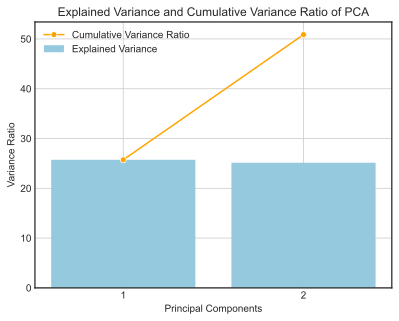

In [274]:
#--------------------------------------------
# PLot the result of the PCA
#--------------------------------------------
# Plot the explained variance ratio
sns.barplot(x=np.arange(1, len(pca_eval) + 1), y=pca_eval, color='skyblue', label='Explained Variance')

# Line plot for cumulative explained variance ratio
sns.lineplot(x=np.arange(0, len(sum_pca_eval) + 0), y=sum_pca_eval, marker='o', color='orange', label='Cumulative Variance Ratio')

# Add labels and title
plt.title('Explained Variance and Cumulative Variance Ratio of PCA')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

* The two compoenement explain 100 % of the variance

### Prepare and split the data

In [336]:
#--------------------------------------------
# Stadadizing the PCA components
#--------------------------------------------
std_scaler = StandardScaler()
numeric_df = std_scaler.fit_transform(numeric_df)

In [337]:
# std_scaler = StandardScaler()
# numeric_df = std_scaler.fit_transform(numeric_df)
df = pd.concat([df, pd.DataFrame(numeric_df, columns=numeric_col)], axis=1)
df.head(5)

,gender,tenure,num_of_products,has_cr_card,is_active_member,is_France,is_Germany,is_Spain,exited,age,estimated_salary,balance,credit_score
0,1,2,1,1,1,1,0,0,1,0.293517,0.021886,-1.225848,-0.326221
1,1,1,1,0,1,0,0,1,0,0.198164,0.216534,0.117350,-0.440036
2,1,8,3,1,0,1,0,0,1,0.293517,0.240687,1.333053,-1.536794
3,1,1,2,0,0,1,0,0,0,0.007457,-0.108918,-1.225848,0.501521
4,1,2,1,1,1,0,0,1,0,0.388871,-0.365276,0.785728,2.063884


In [277]:
#--------------------------------------------
# Constract the final df
#--------------------------------------------
# std_scaler = StandardScaler()
# numeric_df = std_scaler.fit_transform(numeric_df)
df = pd.concat([df, pd.DataFrame(numeric_df, columns=['PC1', 'PC2'])], axis=1)
df.head(5)

,gender,tenure,num_of_products,has_cr_card,is_active_member,is_France,is_Germany,is_Spain,exited,PC1,PC2
0,1,2,1,1,1,1,0,0,1,-0.714294,0.403363
1,1,1,1,0,1,0,0,1,0,0.224410,-0.003345
2,1,8,3,1,0,1,0,0,1,1.112484,0.103918
3,1,1,2,0,0,1,0,0,0,-0.875444,0.171401
4,1,2,1,1,1,0,0,1,0,0.897328,-0.227845


In [338]:
#--------------------------------------------
# Split the data to train and test
#--------------------------------------------
X = df.drop("exited", axis=1).values
y = df["exited"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=514)

In our imbalanced dataset, the occurrences of customers who do not churn significantly outnumber those who do churn. To address this imbalance, we employ oversampling techniques on train set, specifically using SMOTE (Synthetic Minority Over-sampling Technique). This method involves generating synthetic instances of the minority class, helping us balance the number of churn and non-churn instances in our dataset.

In [339]:
#--------------------------------------------
# OverSampling
#--------------------------------------------
sm = SMOTE(random_state=514)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [340]:
unique, count = np.unique(y_train, return_counts=True)
{k:j for (k,j) in zip(unique, count)}

{0: 6388, 1: 6388}

In [347]:
rf_pipe = Pipeline(steps =[("RF", GradientBoostingClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, subsample=0.75))])
lm_pipe = Pipeline(steps =[("LM", LogisticRegression())]) 

f1_cross_val_scores = cross_val_score(rf_pipe, X_train, y_train, cv=5, scoring='jaccard')
rf_pipe.fit(X_train, y_train)
rf_prediction = rf_pipe.predict(X_test)

lm_pipe.fit(X_train, y_train)
lm_prediction = lm_pipe.predict(X_test)

In [348]:
f1(rf_prediction,y_test)

0.5945241199478487

In [204]:
f1_cross_val_scores

array([0.51236264, 0.67981283, 0.76530612, 0.75116434, 0.76412615])

In [205]:
def RunModel(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    pred = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    cr_v_sc = cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc')
    r_a_s = roc_auc_score(y_test,pred)
    print("Cross Validation Score : ",'{0:.2%}'.format(cr_v_sc.mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(r_a_s))
    
    
    
def model_evaluation(classifier,x_test,y_test):
    
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.3%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = ['#20B2AA','#48D1CC'],fmt ='')
    
    print(classification_report(y_test,classifier.predict(x_test)))

In [206]:
LR = LogisticRegression()

RunModel(LR,X_train,y_train,X_test,y_test)

Cross Validation Score :  69.18%
ROC_AUC Score :  64.79%


              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1575
           1       0.34      0.63      0.44       425

    accuracy                           0.66      2000
   macro avg       0.60      0.65      0.60      2000
weighted avg       0.76      0.66      0.69      2000



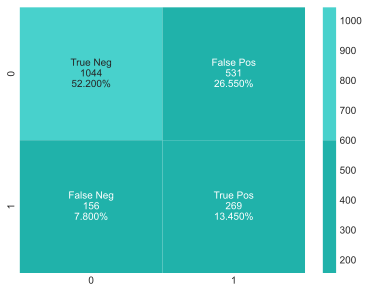

In [207]:
model_evaluation(LR,X_test,y_test)

In [208]:
def best_cut_prob(pred, y, cut_prob = np.arange(0, 1.01, 0.01)):
    result = []
    for p in cut_prob:
        y_hat = (pred > p)*1
        score = ((y==0)*(y_hat==0) + (y==1)*(y_hat==1)).mean()
        result.append(score)
    
    best_score = np.max(result)
    best_prob = cut_prob[result.index(best_score)]
    return best_score, best_prob, result

In [209]:
def cv_pred_y(X_train, y_train, model = RandomForestClassifier(random_state=514), k=10):
    cv = KFold(k)
    y_hat = np.zeros(X_train.shape[0]) 
    for i, j in cv.split(X_train):
        X_train_temp = X_train[i, :]
        y_train_temp = y_train[i]
        X_test_temp = X_train[j, :]

        cross_val_scores = cross_val_score(model, X_train_temp, y_train_temp, cv=5, scoring='f1')
        model.fit(X_train_temp, y_train_temp)
        y_hat[j] = model.predict_proba(X_test_temp)[:,1]
    
    return y_hat